<br><br>

## Exercício clusterização: clusters RFM

<br>

No exercício a seguir, estudaremos um conceito muito interessante e comum no contexto de dados, os __clusters RFM!__

A sigla __RFM__ vem do inglês, significando __recency, frequency and monetary.__ Em português, recência, frequência e valor monetário.

Essa clusterização é muito comum quando o __objetivo é segmentar clientes de uma certa base__ em termos de:

<br>

__Recência__ de compra: há quantos dias foi feita a última compra, relativo a data atual;

__Freqûencia__ de compra: considerando uma certa janela de tempo, qual a frequência (ou quantidade) de compra;

__Valor monetário__ das compras: qual foi o total gasto, nesta mesma janela de tempo.


<br>

Use a função getData para carregar os dados disponíveis para este exercício.

Esse dataset contém 4 colunas, em que cada linha/istância corresponde a um cliente único de uma certa empresa.

As colunas "rec", "freq" e "valor" indicam a recência, frequência e valor monetário do cliente num período de 120 dias.

Desta forma, por exemplo, um usuário com:

    - recência: 30
    
    - frequência: 5
    
    - valor: 10
    
deve ser interpretado como: um usuário que fez a última compra há 30 dias atrás; que a frequência mensal de compra dele, dentro dos últimos 120 dias foi de 5 vezes; o valor médio gasto, dentro desse período de 120 dias, foi de R$10,00.

<br>

__Exercício:__

Como cientista de dados da empresa, o seu __objetivo__ é __analisar os dados disponíveis__ e procurar pelos __grupos de clientes mais valiosos e menos valiosos__ para a companhia. 

Justifique bastante suas análises e __interprete os resultados.__

Você pode (e deve!) utilizar técnicas de clusterização, como __KMeans__ e __DBSCAN__, bem como criar segmentações a partir de suas __análises exploratórias.__

Lembre-se que, neste contexto não supervisionado, não existe resposta certa e a __criatividade__ é fundamental!

__Obs.:__ Ao utilizar o KMeans e o DBSCAN, lembre-se de normalizar os dados antes de aplicar os algoritmos.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def getData():
    return pd.read_csv("dataframe_exercicio_clusterizacao_RFM.csv")

In [4]:
df = getData()
df = df.set_index('user') #vou indexar como indice o user

#### Neste conjunto de dados, vou iniciar realizando uma análise exploratória sobre os dados, e ver se posso otimizar a análise com as funções do pandas como o df.info() e df.describe()

In [5]:
df.info() #sem valores nulos, tipos apropriados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 1 to 1012
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rec     1012 non-null   float64
 1   freq    1012 non-null   float64
 2   valor   1012 non-null   float64
dtypes: float64(3)
memory usage: 31.6 KB


In [6]:
df.describe()

,rec,freq,valor
count,1012.000000,1012.000000,1012.000000
mean,45.064229,4.524704,109.568915
std,26.471133,2.423586,125.013542
min,1.000000,1.000000,10.859150
25%,23.000000,2.000000,57.097928
50%,45.000000,5.000000,103.561817
75%,68.000000,7.000000,152.704398
max,118.000000,17.000000,3241.824119


#### Visualizando os dados

<AxesSubplot:>

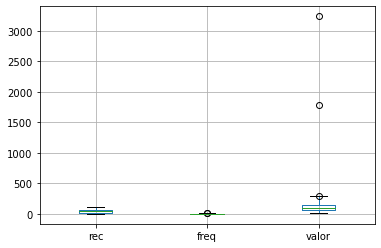

In [7]:
df.boxplot()

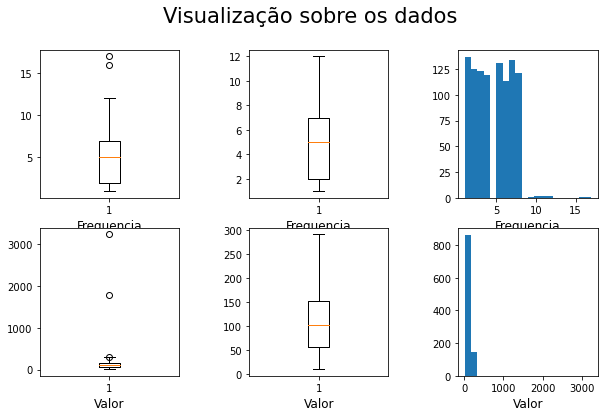

In [8]:
# Análisando os outliers(valores discrepantes):

fig = plt.figure(figsize=(10,6)) #tamanho do frame 
plt.subplots_adjust(wspace= 0.5) #espaço entre os graficos
plt.suptitle('Visualização sobre os dados', fontsize = (21)) #titulo da visão geral (não é o título de cada gráfico)
plt.subplot(2,3,1) #posição do primeiro gráfico (2 linhas, 3 colunas, posição 1 )
plt.boxplot(df.freq, meanline = True) #Boxplot normal
plt.xlabel('Frequencia', {'fontsize': 12}) #legenda no eixo x
plt.subplot(2,3,2)
plt.boxplot(df.freq, showfliers=False) #Boxplot sem os outliers
plt.xlabel('Frequencia', {'fontsize': 12})
plt.subplot(2,3,3)
plt.hist(df.freq, bins = 20) #Histograma
plt.xlabel('Frequencia', {'fontsize': 12})
# Segunda linha
plt.subplot(2,3,4) 
plt.boxplot(df.valor, meanline = True) 
plt.xlabel('Valor', {'fontsize': 12}) 
plt.subplot(2,3,5)
plt.boxplot(df.valor, showfliers=False)
plt.xlabel('Valor', {'fontsize': 12})
plt.subplot(2,3,6)
plt.hist(df.valor, bins = 20) 
plt.xlabel('Valor', {'fontsize': 12})
plt.show()

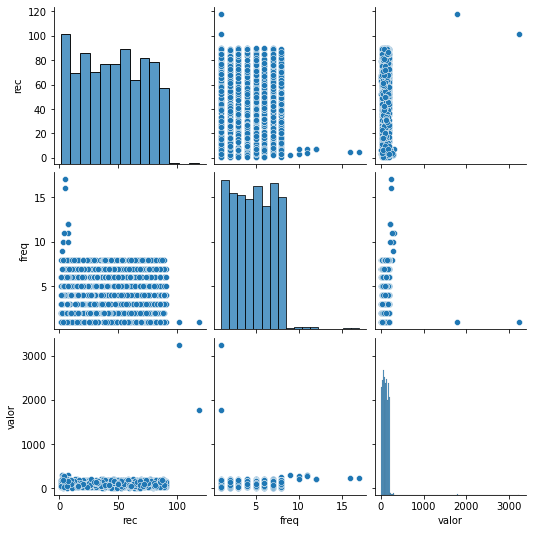

In [9]:
sns.pairplot(df,palette='bwr') # Análises bidimensionais

#### Após a visualização dos dados, os dados tem alguns valores discrepantes, uma possibilidade seria analisar com os dados sem os outliers e ver se há alguma mudanção considerável na análise.

- Vou analisar os dados sem os outliers das variaveis freq e valor, primeiro passo será criar uma função que vai separar balancear os dados, em etapas:
    - Dividir os dados percentis, sendo que vamos determinar que se o dado for entre 25 e 75 por cento dos dados.
    - O que estiver fora desse parametro será considerado outlier

In [10]:
def detecta_outlier(x, limite = 1.5): #Parametros x seria a coluna, e o limite é padrão da biblioteca mas pode ser alterado conforme necessidade
    dq = np.percentile(x, 75) - np.percentile(x, 25) #Criamos a variavel dq, que com a função do numpy np.percentile() pega a porcentagem de um valor. no caso queremos entre 25% e 75% dos valores
    limite_inf = np.maximum(np.percentile(x, 25) - limite * dq, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * dq, np.max(x))
    print("Limite inferior:", limite_inf)
    print("Limite superior:", limite_sup)
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0) #Retorna os limites

In [14]:
# Limites das variaveis
df['outliers_freq'] = detecta_outlier(df.freq)
df['outliers_valor'] = detecta_outlier(df.valor)

Limite inferior: 1.0
Limite superior: 14.5
Limite inferior: 10.859149564076176
Limite superior: 296.11410270598026


<AxesSubplot:>

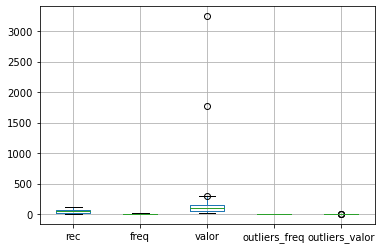

In [20]:
# outliers de frequencia
cenário_1 = df[df['outliers_freq']==0].boxplot()
cenário_1

<AxesSubplot:>

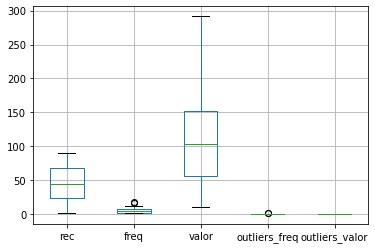

In [21]:
# outliers de valor
cenário_2 = df[df['outliers_valor']==0].boxplot() 
cenário_2

In [25]:
# Analisando os outliers em geral
df['outlier'] = df['outliers_freq']+df['outliers_valor']
df[df['outlier']!=0]

,rec,freq,valor,outliers_freq,outliers_valor,outlier
user,,,,,,
173,5.0,16.0,223.899432,1,0,1
188,7.0,11.0,299.624773,0,1,1
194,5.0,17.0,237.024889,1,0,1
304,118.0,1.0,1779.313280,0,1,1
646,101.0,1.0,3241.824119,0,1,1


In [28]:
df[['rec', 'freq', 'valor']].describe()

,rec,freq,valor
count,1012.000000,1012.000000,1012.000000
mean,45.064229,4.524704,109.568915
std,26.471133,2.423586,125.013542
min,1.000000,1.000000,10.859150
25%,23.000000,2.000000,57.097928
50%,45.000000,5.000000,103.561817
75%,68.000000,7.000000,152.704398
max,118.000000,17.000000,3241.824119


- Os casos discrepantes pode ser um comportamento de 2 tipos de clientes:
    - Um com recencia abaixo da média, uma frequência alta e um valor acima da média, pode ser caso de cliente consumista.
    - Outro cenário seria um perfil de clientes com recencia alta, frequencia minima, e um valor gasto alto. Pode ser um indicio de cliente conservador.

#### Próximo passo seria tratar os dados sem os outliers, e efetuar a normalização dos dados

In [143]:
# Dataset sem outliers
df_novo = df[df['outlier']==0]
df_novo.drop(columns=['outliers_freq', 'outliers_valor', 'outlier'], inplace = True)

C:\Users\gilma\AppData\Local\Temp\ipykernel_3708\1227559850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo.drop(columns=['outliers_freq', 'outliers_valor', 'outlier'], inplace = True)


In [151]:
df_novo.corr() # Dataset tem pouca correlação

,rec,freq,valor
rec,1.000000,0.006739,0.014524
freq,0.006739,1.000000,-0.047249
valor,0.014524,-0.047249,1.000000


In [317]:
from  sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_novo, test_size=0.30)

In [318]:
# Vou Normalizar os dados
st = StandardScaler()
Xsc = st.fit_transform(df_train.values)

In [319]:
Xsc

array([[ 1.21646511,  1.04183375,  0.72237992],
       [-1.5565239 ,  0.61787366, -0.55541527],
       [-0.2855706 , -0.23004653,  0.84751957],
       ...,
       [-0.78624917,  1.04183375,  1.53347897],
       [-1.5565239 ,  1.46579384,  1.14406612],
       [ 0.25362171,  1.04183375, -1.67831003]])

## Kmeans

In [156]:
from sklearn.cluster import KMeans

- Agora vou utilizar o método do cotovelo, que estima um bom numero de clusters a ser utilizado.

C:\Users\gilma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


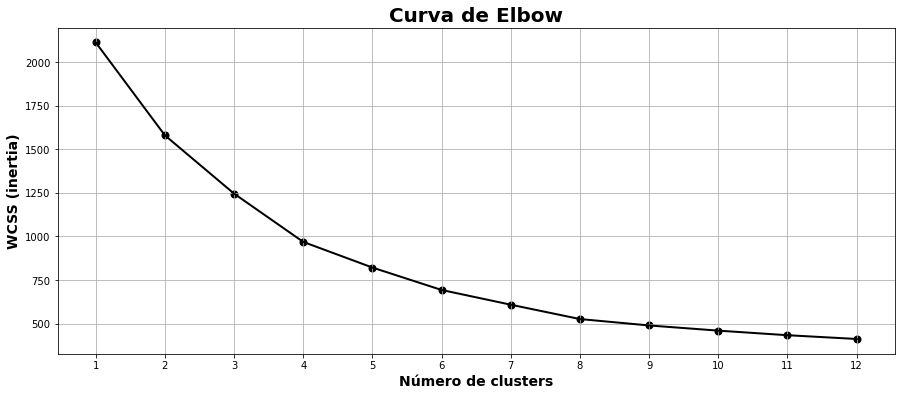

In [320]:
#calculando as inertias - WCSS para cada cluster
lista_inertias = []
for i in range(1, 13):
    km = KMeans(n_clusters=i)
    km.fit(Xsc)
    lista_inertias.append(km.inertia_)
    
    
#plotando a curva de elbow    
plt.figure(figsize=[15,6])
plt.title("Curva de Elbow", fontsize = 20, fontweight = 'bold')
plt.xlabel("Número de clusters", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS (inertia)", fontsize = 14, fontweight = 'bold')
plt.plot(range(1, 1+len(lista_inertias)), lista_inertias, c = 'black', lw = 2)
plt.scatter(range(1, 1+len(lista_inertias)), lista_inertias, c = 'black', lw = 2)
plt.xticks(range(1,1+len(lista_inertias)))
plt.grid()
plt.show()

- Creio que pela pouca correlação, e pelo metodo acima o numero de cluster pode variar, sendo que até 4 pontos a queda é mais acentuada e depois a curva é menor, mas também posso considerar com 6 ou 7 clusters.

In [321]:
ypred = km.predict(Xsc)

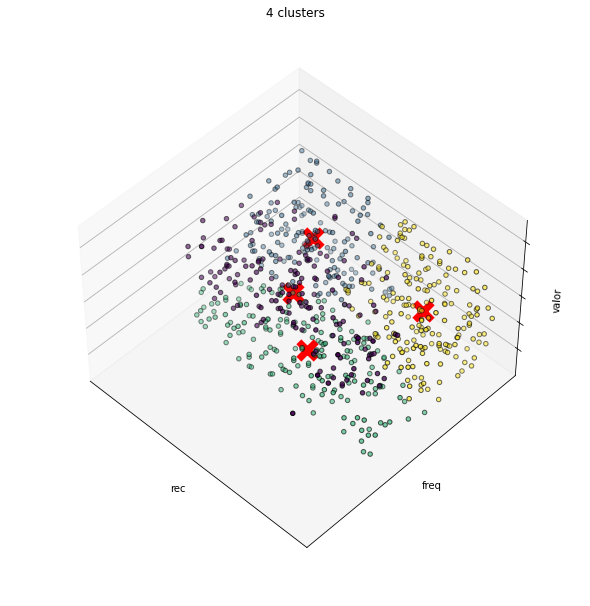

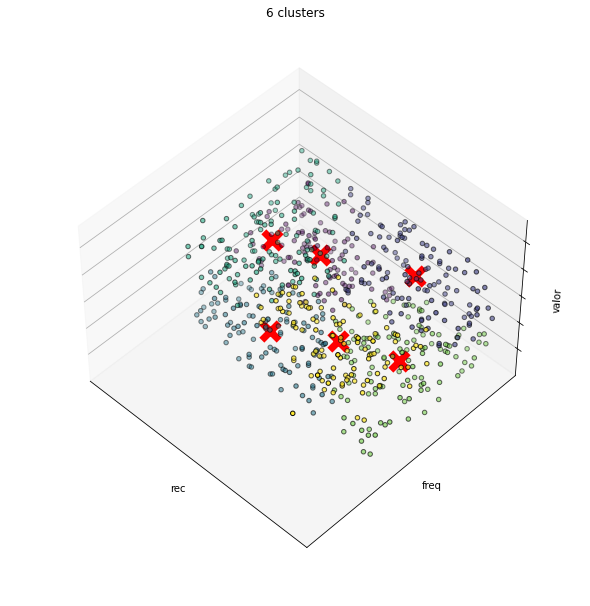

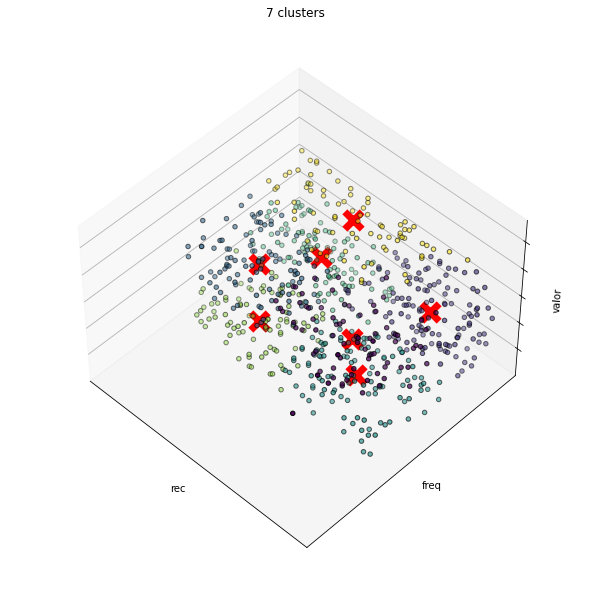

In [322]:
# Plot Gráfico 3d, referencia sklearn

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = Xsc
y = ypred

estimators = [
    ("k_means_4", KMeans(n_clusters=4)),
    ("k_means_6", KMeans(n_clusters=6)),
    ("k_means_7", KMeans(n_clusters=7)),
]

fignum = 1
titles = ["4 clusters", "6 clusters", "7 clusters"]
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(15, 8))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(float), edgecolor="k")
    
    for centr in est.cluster_centers_:
        ax.scatter(centr[0], centr[1], centr[2], s = 300, marker = 'x', c = 'red', lw = 7)
        continue
        
    plt.xticks([])
    plt.yticks([])


    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("rec")
    ax.set_ylabel("freq")
    ax.set_zlabel("valor")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

plt.show()

- A fim de conseguir visualizar os dados gerei um gráfico de 3 dimensões, sendo que:
    - Um com 4 clusters
    - Um com 6 clusters
    - Outro com 7 clusters
    
- Porém a análise de performance do modelo se baseia em impressões, por ser uma análise em 3 dimensões, a forma de percepção pode ser não tão precisa.

- Contudo creio  que o gráfico com 4 clusters dividiu bem os dados, em pontos como:
    - Os centroides estão marcados com x.

In [323]:
km = KMeans(n_clusters=4).fit(Xsc)

In [324]:
km.cluster_centers_ # pontos marcados no gráfico

array([[-0.95438441, -0.83179634,  0.07717142],
       [-0.0229588 ,  0.77823162, -0.93757323],
       [ 0.12074932,  0.85105171,  1.04272686],
       [ 0.98561611, -0.79789611, -0.00144574]])

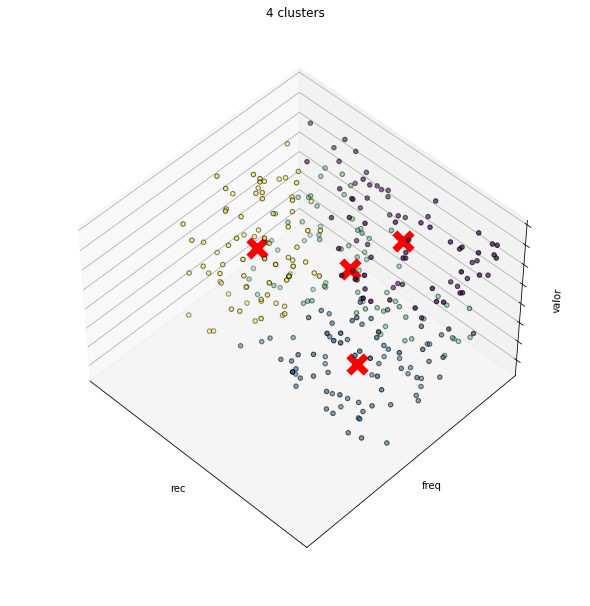

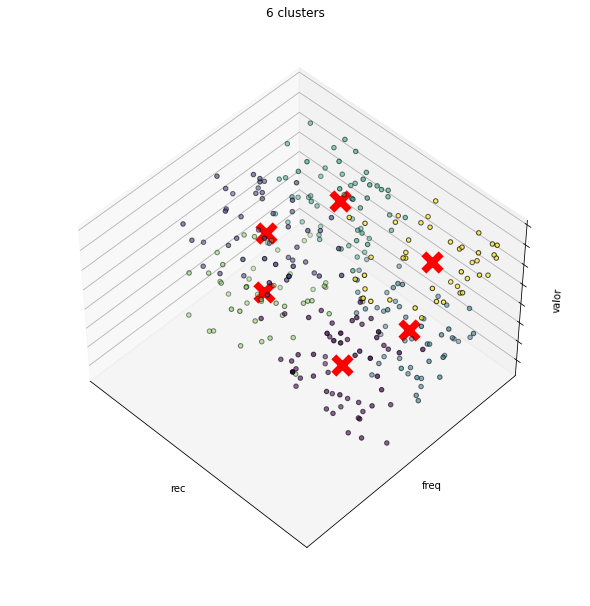

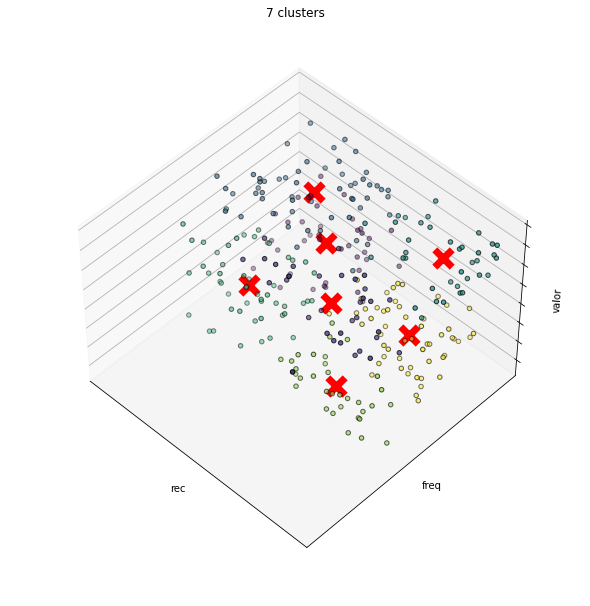

In [325]:
Xsc = st.fit_transform(df_test.values)
# Realizando em dados de teste

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = Xsc
y = ypred

estimators = [
    ("k_means_4", KMeans(n_clusters=4)),
    ("k_means_6", KMeans(n_clusters=6)),
    ("k_means_7", KMeans(n_clusters=7)),
]

fignum = 1
titles = ["4 clusters", "6 clusters", "7 clusters"]
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(15, 8))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(float), edgecolor="k")
    
    for centr in est.cluster_centers_:
        ax.scatter(centr[0], centr[1], centr[2], s = 300, marker = 'x', c = 'red', lw = 7)
        continue
        
    plt.xticks([])
    plt.yticks([])


    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("rec")
    ax.set_ylabel("freq")
    ax.set_zlabel("valor")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

plt.show()

- dados de teste trouxe um cenário em que é dependendo do ponto de vista, o modelo consegue agrupar certos grupos que parece
fazer sentido.
- Pelo fato de ser um modelo em 3 dimensões, pode acontecer casos de valores discrepantes impercetiveis, por questão de dimensionaliade.


In [366]:
df_test['km'] = km.predict(Xsc)
df_test

,rec,freq,valor,km3,km
user,,,,,
536,78.0,8.0,21.857982,1,1
430,45.0,7.0,14.355818,1,1
707,25.0,3.0,181.408642,0,0
372,85.0,6.0,149.590442,2,2
83,44.0,4.0,190.060274,2,2
...,...,...,...,...,...
303,28.0,1.0,193.550067,0,0
267,36.0,8.0,85.317290,1,1
505,89.0,6.0,187.744740,2,2


<AxesSubplot:xlabel='km3'>

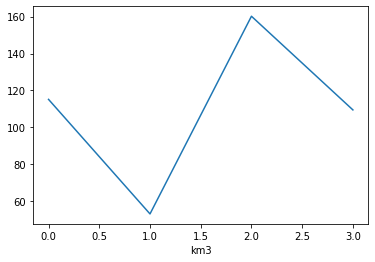

In [369]:
df_test.groupby(['km3']).agg('valor').mean().plot()

<AxesSubplot:xlabel='km3'>

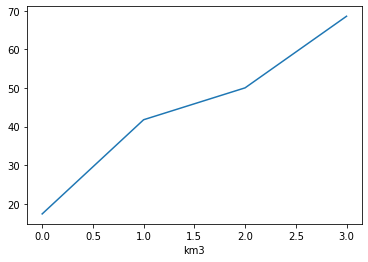

In [370]:
df_test.groupby(['km3']).agg('rec').mean().plot()

## Conclusões

- No cenário de segmentaçoes de perfis de consumidores, criei um modelo que segmente bem os dados.
- Mas no caso de ser aprendizado não supervisionado, e ser um que generalizou bastante, acredito que o resultado foi positivo.

- No cenário do caso estudado, creio que essas previsões pode ser eficaz, para entender e agrupar grupos de clientes:
    - Grupo poucos frequentes e gasto mediano
    - Grupo com recencia media de 42 dias e gasto abaixo da media
    - Grupo com recencia acima da media e consumo acima dos demais
    - Grupo com recencia elevada e consumo acima da media